# **Artificial Neural Nets (ANN) with Keras**
[**Keras**](https://keras.io/) is a high-level Deep Learning API que permite contruir,entrenar,evaluar y ejecutar todo tipo de redes neuronales(ANN). Para realizar los pesados y rigurosos calculos **(Autodiff)** que requieren las ANN se basa en un *Backend* de cálculo. Tres biblotecas open-source usadas para ello son: : **TensorFlow**, **Microsoft Cognitive Toolkit(CNTK)**, and **Theano**. 
 
Además TensorFlow posee una implementacion de **Keras** en tf.keras que solo permite usar el backend de Tensorflow pero tiene la ventaja de ofrecer algunas caracteristicas extras muy útiles. 

Code `examples documented` on keras.io will work fine with tf.keras,
but you need to change the imports. For example, consider this keras.io code:
```python
    from keras.layers import Dense
    output_layer = Dense(10)
```

In [1]:
# # TensorFlow ≥2.0 is required
import tensorflow as tf
tf.__version__


'2.10.0'

In [2]:
from tensorflow import keras
from keras.backend import backend

print("Version of Keras: ",keras.__version__)   
print("Actually Backend using  by Keras: ",backend())   


Version of Keras:  2.10.0
Actually Backend using  by Keras:  tensorflow


## Activation functions

In [3]:
import numpy as np


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def relu(z):
    return np.maximum(0, z)


def derivative(f, z, eps=0.000001):
    """calculating the derivative using the slope(pendiente) formula 
    """
    return (f(z + eps) - f(z - eps))/(2 * eps)


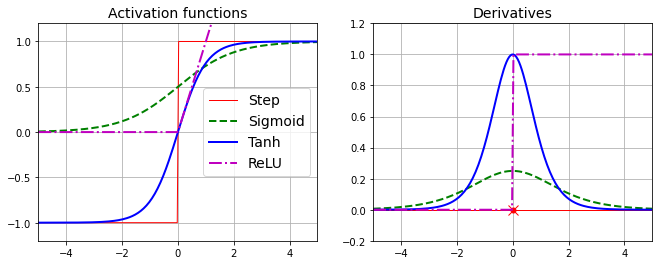

In [4]:
import matplotlib.pyplot as plt
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()


## Building an Image Classifier Using the **Sequential API and Implementing MLP**

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

Al cargar MNIST o Fashion MNIST utilizando Keras en lugar de
ScikitLearn, una diferencia importante es que cada imagen se representa
como una matriz de 28 × 28 en lugar de una matriz 1D de tamaño 784.
Además, las intensidades de los píxeles se representan como enteros
(de 0 a 255) en lugar de flotantes 

The labels are the class IDs (represented as uint8), from 0 to 9:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
print(f"The training set contains {X_train_full.shape} grayscale images, each 28x28 pixels" )
print(f"Each pixel intensity is represented as a byte (0 to 255): {X_train_full.dtype}" )
print(f"type of data: {type(X_train_full)}" )



The training set contains (60000, 28, 28) grayscale images, each 28x28 pixels
Each pixel intensity is represented as a byte (0 to 255): uint8
type of data: <class 'numpy.ndarray'>


Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [7]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

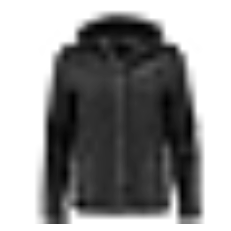

In [8]:
plt.imshow(X_train[0], cmap="binary",interpolation="bilinear")
plt.axis('off')
plt.show()

Here are the corresponding class names:

In [9]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's take a look at a sample of the images in the dataset:

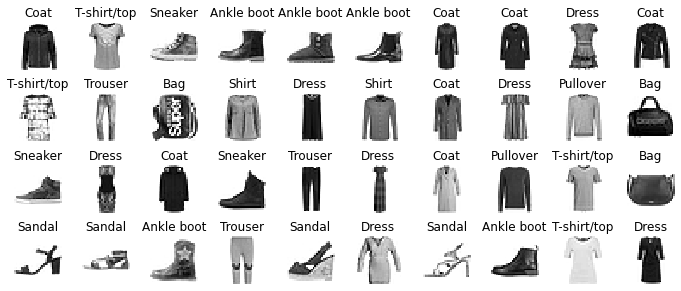

In [10]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Si se establecen tanto la semilla global como la de operación, ambas semillas se utilizan conjuntamente para determinar la secuencia aleatoria.

In [11]:
from keras.backend import clear_session

# reiniciar (en caso de q ya se hayan ejecutados otras capas) la genracion del # de los sequential
clear_session()

# semilla global
tf.random.set_seed(42)

# semilla par las operaciones con numpy
np.random.seed(42)


In [12]:
from keras.layers import Dense,Flatten
from keras.models import Sequential
import keras as kr

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.layers

*  Primero se crea un modelo Secuencial. Este es el tipo más
simple de modelo Keras para redes neuronales que están
compuestas de una sola pila(stack) de capas conectadas
secuencialmente. 
* Construimos la primera capa y la añadimos al
modelo. Se trata de una capa de aplanamiento cuya función es
convertir cada imagen de entrada en una matriz 1D: si recibe
datos de entrada X, calcula X.reshape(-1, 1). Esta capa no tiene
ningún parámetro; sólo está ahí para hacer un simple
preprocesamiento. Dado que es la primera capa del modelo,
debería especificar el input_shape, que no incluye el tamaño del lote, sólo
la forma de las instancias. Como alternativa
podría añadir una keras.layers.InputLayer como primera capa,
estableciendo
input_shape=[28,28].

* A continuación añadimos una capa oculta Densa con 300
neuronas. Utilizará la función de activación ReLU. Cada capa
Densa gestiona su propia matriz de pesos, que contiene todos
los pesos de conexión entre las neuronas y sus entradas.
También gestiona un vector de términos de sesgo (uno por
neurona).

* A continuación, añadimos una segunda capa oculta densa con 100
neuronas, utilizando también la función de activación ReLU.

* Por último, añadimos una capa de salida densa con 10
neuronas (una por clase), utilizando la función de activación
softmax (porque las clases son excluyentes).

Especificar `activation="relu"` es equivalente a especificar `activation=keras.activations.relu`.
Otras funciones de activación están disponibles en el paquete keras.activations, utilizaremos
muchas de ellas eneste libro. Consulte https://keras.io/activations / para ver la lista completa.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


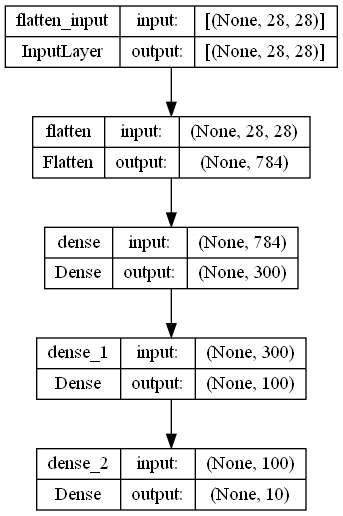

In [14]:
from keras.utils import plot_model
%matplotlib inline

# requiere tener instalado als librerias pydot y graphviz
plot_model(model, "resources/my_fashion_mnist_model.png", show_shapes=True)


In [15]:
hidden1 = model.layers[2]
weights, biases = hidden1.get_weights()
hidden1.name

'dense_1'

Observe que la capa Dense inicializó los pesos de conexión
aleatoriamente (lo que es necesario para romper la simetría, como hemos
discutido antes), y los sesgos se inicializaron a ceros, lo que está bien. para un método de inicialización diferente, puede establecer *kernel_initializer* o *bias_initializer* al crear la capa, consulte https://keras.io/api/layers/initializers/


In [16]:
weights

array([[-0.08167107, -0.02497659, -0.05644952, ..., -0.0265336 ,
         0.05993824, -0.06809561],
       [ 0.02410316, -0.08808165,  0.06044795, ..., -0.06424746,
         0.03275175,  0.11702042],
       [ 0.04306453, -0.04289018, -0.0094524 , ..., -0.11007366,
         0.09939573, -0.01650094],
       ...,
       [ 0.08392494,  0.11592456,  0.08185608, ...,  0.1117628 ,
        -0.06929205,  0.11412244],
       [ 0.10882346,  0.07217408, -0.09763347, ...,  0.01926059,
         0.08961969,  0.09248165],
       [ 0.05489216, -0.06014215, -0.07206599, ...,  0.03539919,
         0.04600903,  0.05453951]], dtype=float32)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",  # default learnig_rate=0.01
              metrics=["accuracy"])


This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

Se utiliza la función **"sparse_categorical_crossentropy"** porque tenemos etiquetas dispersas
(es decir, para cada instancia, sólo hay un índice de clase objetivo, de 0
a 9 en este caso), y las clases son excluyentes. Si, en cambio,
tuviéramos una probabilidad objetivo por clase para cada instancia
(such as one-hot vector labels, por ejemplo [0.,0., 0., 1., 0., 0., 0., 0., 0., 0.] para representar la clase 3), entonces tendríamos que utilizar la pérdida **"categorical_crossentropy"** en su lugar. Si
estuviéramos haciendo una clasificación binaria (con una o más
etiquetas binarias), entonces utilizaríamos la función de activación
"sigmoide" (es decir, logística) en la capa de salida en lugar de la
función de activación "softmax", y utilizaríamos la pérdida
**"binary_crossentropy"**.

>If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use
the keras.utils.to_categorical() function

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7312 - accuracy: 0.7597 - val_loss: 0.5212 - val_accuracy: 0.8220
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4886 - accuracy: 0.8287 - val_loss: 0.4381 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4405 - accuracy: 0.8446 - val_loss: 0.5154 - val_accuracy: 0.8110
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4130 - accuracy: 0.8564 - val_loss: 0.3925 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3945 - accuracy: 0.8625 - val_loss: 0.3772 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8681 - val_loss: 0.3697 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3636 - accuracy: 0.8722 - val_loss: 0.3647 - val_accuracy:


El método fit() devuelve un objeto **History** que contiene los parámetros de
entrenamiento (history.params), la lista de épocas por las que ha
pasado ( history.epoch) y, lo que es más importante, un diccionario (
history.history) que contiene las métricas de pérdida y extra que ha
medido al final de cada época en el conjunto de entrenamiento y en el
conjunto de validación (si existe). Si usamos este diccionario para crear
un pandas DataFrame y llamamos a su método plot(), obtendremos las
curvas de aprendizaje

In [19]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

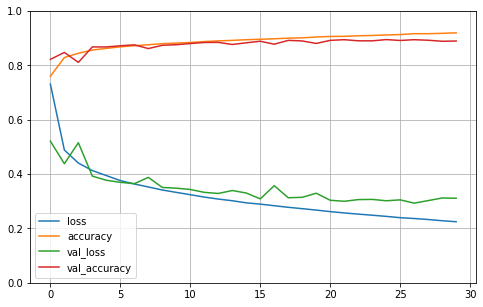

In [21]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.ylim((0,1))
plt.grid()

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3427 - accuracy: 0.8824


[0.3426768481731415, 0.8823999762535095]

In [23]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 99ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.04, 0.  , 0.94],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

**Warning**: `model.predict_classes(X_new)` is deprecated. It is replaced with `np.argmax(model.predict(X_new), axis=-1)`.

In [24]:
#y_pred = model.predict_classes(X_new) # deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 29ms/step


array([9, 2, 1], dtype=int64)

In [25]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)